In [1]:
from pycaret.datasets import get_data
from pycaret.regression import * 

In [3]:
data = get_data('insurance')

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.shape

(1338, 7)

In [5]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
train = data.sample(frac=0.9)
test = data.drop(train.index)

In [10]:
e = RegressionExperiment()

In [11]:
cats = data.select_dtypes("object").columns.to_list()
cats

['sex', 'smoker', 'region']

In [14]:
e.setup(data=train,target="charges",train_size=0.8,categorical_features=cats)

,Description,Value
0,Session id,5779
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1204, 7)"
4,Transformed data shape,"(1204, 10)"
5,Transformed train set shape,"(963, 10)"
6,Transformed test set shape,"(241, 10)"
7,Numeric features,3
8,Categorical features,3
9,Preprocess,True


In [15]:
top3 = e.compare_models(n_select = 3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2486.0704,20962722.5474,4552.0658,0.8549,0.4236,0.2829,0.1300
lightgbm,Light Gradient Boosting Machine,2731.1237,22586278.0900,4731.9108,0.8433,0.5611,0.3447,0.2170
rf,Random Forest Regressor,2597.3403,22666153.2931,4736.4084,0.8433,0.4515,0.3069,0.2380
et,Extra Trees Regressor,2664.8902,26052808.5280,5082.7340,0.8201,0.4644,0.3074,0.1980
ada,AdaBoost Regressor,4011.1403,26811023.0503,5168.3924,0.8161,0.5921,0.6460,0.0680
ridge,Ridge Regression,4291.7309,36392105.6736,6008.6772,0.7510,0.5755,0.4419,0.0310
lar,Least Angle Regression,4281.5111,36389462.7919,6008.0813,0.7509,0.5731,0.4401,0.0310
llar,Lasso Least Angle Regression,4281.6500,36388800.3711,6008.0224,0.7509,0.5735,0.4401,0.0300
br,Bayesian Ridge,4286.9251,36391208.0393,6008.4314,0.7509,0.5740,0.4410,0.0610
lasso,Lasso Regression,4281.6550,36388807.8837,6008.0230,0.7509,0.5735,0.4401,0.0320


In [16]:
top3

[GradientBoostingRegressor(random_state=5779),
 LGBMRegressor(n_jobs=-1, random_state=5779),
 RandomForestRegressor(n_jobs=-1, random_state=5779)]

In [17]:
gbr = e.create_model("gbr")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2335.4884,19031349.7918,4362.4935,0.8656,0.3748,0.2405
1,2683.4347,25961152.5631,5095.2088,0.8415,0.4226,0.2571
2,2171.7507,20201249.9881,4494.5801,0.8969,0.3944,0.2364
3,2259.0405,16560028.1474,4069.4014,0.8934,0.3703,0.2577
4,2624.1148,22946501.4419,4790.2507,0.8377,0.4010,0.3168
5,2699.3991,24758853.1264,4975.8269,0.8129,0.3994,0.2868
6,2495.5068,18946390.4207,4352.7452,0.8863,0.5166,0.3446
7,2616.2906,21534501.7774,4640.5282,0.7852,0.5434,0.3090
8,2089.8789,12283213.5038,3504.7416,0.9189,0.3632,0.2709


In [18]:
tuned_gbr = e.tune_model(gbr)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2442.2647,16905964.7017,4111.6864,0.8806,0.3683,0.2485
1,3034.0120,28394707.9249,5328.6685,0.8266,0.4541,0.2953
2,2804.6436,22057592.5914,4696.5511,0.8874,0.4487,0.3336
3,2339.5802,13471244.9168,3670.3195,0.9133,0.3304,0.2455
4,2921.1027,24344794.4674,4934.0444,0.8278,0.4201,0.3464
5,3002.2552,25525857.2743,5052.3121,0.8071,0.4386,0.3241
6,2774.3569,19549499.2359,4421.4816,0.8827,0.5035,0.3601
7,2682.2468,20666640.2975,4546.0577,0.7938,0.4970,0.3298
8,2339.9531,13164292.1110,3628.2630,0.9131,0.3606,0.2877


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [19]:
lgbm = e.create_model("lightgbm")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2515.3323,19615853.0273,4428.9788,0.8615,0.6259,0.3262
1,3134.0169,28508688.4498,5339.3528,0.8259,0.5366,0.3498
2,2578.0673,21847276.7091,4674.1070,0.8885,0.4914,0.3392
3,2442.2170,18226299.2495,4269.2270,0.8827,0.3991,0.2685
4,2876.0837,23643115.5724,4862.4187,0.8328,0.7731,0.4143
5,2987.1813,26616820.8149,5159.1492,0.7988,0.4811,0.3757
6,2675.8919,21266906.1385,4611.6056,0.8724,0.5653,0.3825
7,2813.4699,25108683.2532,5010.8565,0.7495,0.8625,0.3813
8,2458.2773,14644541.7749,3826.8188,0.9033,0.4533,0.3429


In [20]:
tuned_lgbm = e.tune_model(lgbm)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2480.9530,18786575.1115,4334.3483,0.8674,0.4766,0.2718
1,2999.5663,26836343.5758,5180.3806,0.8361,0.4535,0.3062
2,2699.2448,24773502.9906,4977.2988,0.8736,0.4695,0.3253
3,2575.1115,17118918.3565,4137.5015,0.8898,0.3651,0.2776
4,2817.7583,24773443.9959,4977.2928,0.8248,0.4953,0.3838
5,2971.5084,25523833.0033,5052.1117,0.8071,0.4459,0.3309
6,2888.3474,21890597.3396,4678.7389,0.8686,0.6914,0.3857
7,2748.5725,23167052.0881,4813.2164,0.7689,0.5586,0.3438
8,2537.3821,14309893.2817,3782.8420,0.9055,0.3893,0.3151


Fitting 10 folds for each of 10 candidates, totalling 100 fits


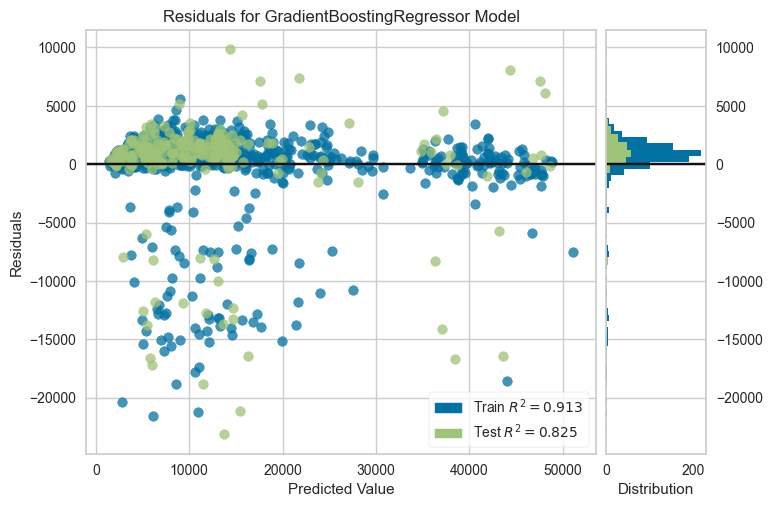

In [21]:
e.plot_model(tuned_gbr)

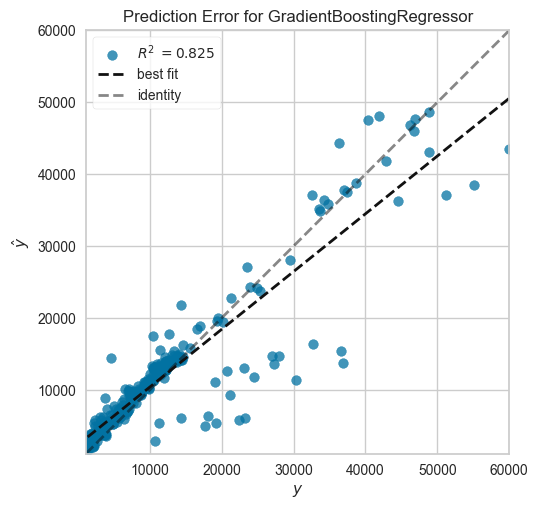

In [22]:
e.plot_model(tuned_gbr,plot='error')

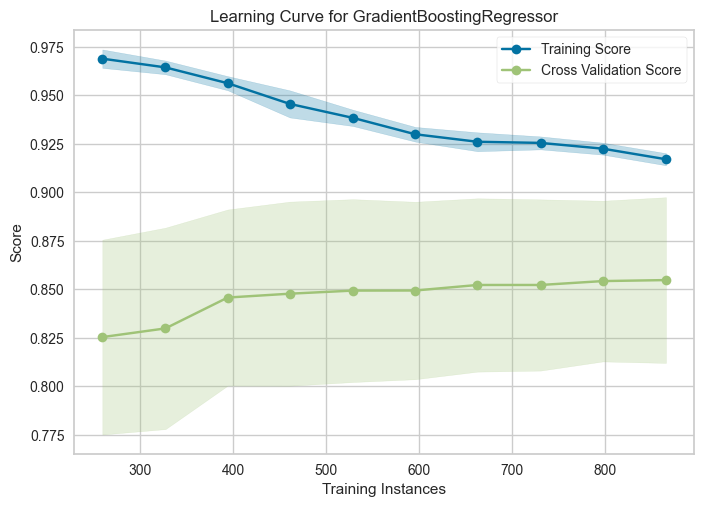

In [23]:
e.plot_model(tuned_gbr,plot='learning')

In [24]:
e.plot_model(tuned_gbr,plot='parameter')

,Parameters
alpha,0.9
ccp_alpha,0.0
criterion,friedman_mse
init,None
learning_rate,0.1
loss,squared_error
max_depth,3
max_features,None
max_leaf_nodes,None
min_impurity_decrease,0.0


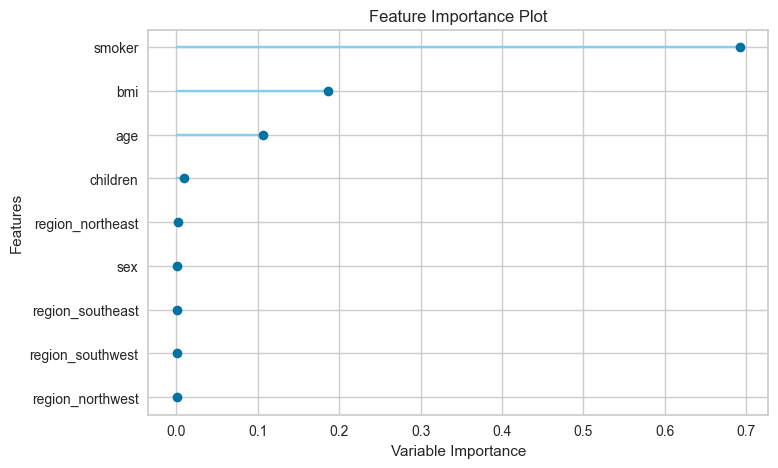

In [25]:
e.plot_model(tuned_gbr,plot='feature')

In [26]:
blender = e.blend_models(estimator_list=top3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2215.5073,17874133.3425,4227.7811,0.8738,0.3993,0.2341
1,2763.4064,27004120.8612,5196.5489,0.8351,0.4711,0.2965
2,2347.5224,21186264.6767,4602.8540,0.8919,0.4141,0.2784
3,2257.5653,15885461.1189,3985.6569,0.8978,0.3652,0.2485
4,2551.6333,22389883.1962,4731.7949,0.8417,0.4083,0.3057
5,2744.0801,24855948.7027,4985.5741,0.8121,0.4292,0.3163
6,2499.1535,19130152.7404,4373.8030,0.8852,0.5158,0.3480
7,2630.8751,22427157.5690,4735.7320,0.7763,0.5872,0.3359
8,2200.5604,13303604.6260,3647.4107,0.9122,0.3954,0.2990


In [27]:
stacker = e.stack_models(estimator_list=top3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2170.1957,17867579.8212,4227.0060,0.8738,0.3730,0.2189
1,2717.9598,26596455.6061,5157.1752,0.8376,0.4546,0.2884
2,2297.9241,20983089.4771,4580.7302,0.8929,0.4058,0.2634
3,2234.1980,15731483.2542,3966.2934,0.8988,0.3685,0.2552
4,2541.9199,22617290.7665,4755.7640,0.8401,0.3935,0.3020
5,2689.0844,24528071.9228,4952.5823,0.8146,0.4122,0.2999
6,2465.9430,18851225.4266,4341.7998,0.8869,0.5071,0.3466
7,2592.6586,21913484.5229,4681.1841,0.7814,0.5672,0.3273
8,2137.7772,12700251.1751,3563.7412,0.9162,0.3809,0.2898


In [28]:
holdout_pred = e.predict_model(stacker)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Stacking Regressor,2610.8931,23401372.6130,4837.4965,0.8243,0.3772,0.2654


In [30]:
holdout_pred2 = e.predict_model(tuned_gbr)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2647.7000,23287941.0960,4825.7581,0.8252,0.3786,0.2688


In [31]:
final_gbr = e.finalize_model(tuned_gbr)

In [32]:
final_gbr

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['age', 'bmi', 'children'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['sex', 'smoker', 'region'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('ordinal_encoding',
                 TransformerWrapper(include=['sex', 'smoker'],
                                    transfor...
                                                                         'data_type': dtype('O'),
                                                                         'mapping': female    0
male      1
NaN      -1
dtype: int64},
                                                                        {'col': 'smoker',
                                                                         'data_type': dtype('O'),
                                                                         'mapping': no     0
yes    1
NaN   -1
dtype: int64}]))),
                ('onehot_encoding',
                 TransformerWrapper(include=['region'],
                                    transformer=OneHotEncoder(cols=['region'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('actual_estimator',
                 GradientBoostingRegressor(random_state=5779))])

In [33]:
unseen_pred = e.predict_model(final_gbr,data=test)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2922.3705,26160449.4001,5114.7287,0.8144,0.4981,0.3117


In [34]:
e.save_model(model=final_gbr,model_name='Ins_gbr')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['age', 'bmi', 'children'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['sex', 'smoker', 'region'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('ordinal_encoding',
                  TransformerWrapper(include=['sex', 'smoker'],
                                     transfor...
                                                                          'data_type': dtype('O'),
                                                                          'mapping': female    0
 male      1
 NaN      -1
 dtype: int64},
                                                                         {'col': 'smoker',
                                                                          'data_type': dtype(